# 🚀 Laboratorio TECH: **Pandas + IA (Gemini con `GOOGLE_API_KEY`)**

> Mañana nos espera un **Laboratorio TECH**.  
> Vamos a aprender de forma sencilla y entretenida cómo usar **Pandas** para analizar datos con **modelos de Inteligencia Artificial**.  
> Tendremos **ejemplos guiados** y también momentos para que ustedes **experimenten y guarden su propio trabajo**.  
> La idea es que al final entiendan la teoría con la práctica, salgan con algo hecho por ustedes mismos y la **motivación para seguir creando**. 💡🔥

### ¿Qué haremos?
- Crear un pequeño mundo de datos (ventas de una tiendita) y analizarlo con **pandas**.
- Usar **Gemini** (vía `google-generativeai`) con tu **`GOOGLE_API_KEY`** para:
  - redactar **insights** a partir de agregados de pandas,
  - **clasificar** opiniones de clientes,
  - co‑crear **snippets** de matplotlib.
- Todo **100% práctico**, con explicaciones paso a paso.

In [ ]:
# ===============================
# 0) Instalación de librerías
# ===============================
# pandas: análisis de datos tabulares
# matplotlib: gráficas simples
# google-generativeai: cliente oficial de Gemini (Google)
!pip -q install pandas matplotlib google-generativeai

In [1]:
# =============================================
# 1) Configurar tu GOOGLE_API_KEY (TU TURNO)
# =============================================
# Opción A (recomendada): define tu clave como variable de entorno en Colab.
#   - Ve a tu consola o al inicio del cuaderno y escribe:
#       %env GOOGLE_API_KEY=tu_clave_aqui
#
# Opción B: pegarla de forma oculta (no quedará visible en el cuaderno):
from getpass import getpass
import os
# Descomenta la siguiente línea para pegarla cuando corras la celda:
os.environ["GOOGLE_API_KEY"] = getpass("Pega tu GOOGLE_API_KEY aquí: ")

# Validar que existe una clave antes de seguir:
api_key = os.getenv("GOOGLE_API_KEY", "")
assert api_key, "⚠️ Define GOOGLE_API_KEY (con %env o getpass) antes de continuar."

# Configurar cliente de Gemini
import google.generativeai as genai
genai.configure(api_key=api_key)

# Elegimos un modelo rápido para taller
MODEL_NAME = "gemini-1.5-flash"
model = genai.GenerativeModel(MODEL_NAME)

# Helper para preguntar a la IA
def ask_gemini(prompt, temperature=0.6, json_mode=False):
    """
    Envia un prompt a Gemini y devuelve el texto de la respuesta.
    Si json_mode=True, se pide explicitamente que devuelva SOLO JSON.
    """
    if json_mode:
        prompt = prompt + "\n\nDevuelve SOLO JSON valido."
    response = model.generate_content(
        prompt,
        generation_config={"temperature": float(temperature)}
    )
    return response.text

Pega tu GOOGLE_API_KEY aquí: ··········


In [7]:
# =============================================
# 2) Generar datasets de ejemplo (TU TURNO)
# =============================================
import pandas as pd
from datetime import datetime, timedelta
import random

# TODO: fija la semilla para reproducibilidad
# random.seed(10)

# TODO: define lista de productos con (Producto, Categoría, PrecioLista, Costo)
productos = [
     ("Café Americano", "Bebidas Calientes", 2.5, 1.2),
     ("Croissant", "Panadería", 1.8, 0.8),
     ("Jugo de Naranja", "Bebidas Frías", 3.0, 1.5),
     ("Muffin de Arándanos", "Pastelería", 2.2, 1.0),
     ("Sándwich de Jamón y Queso", "Comida Salada", 4.0, 2.0),
]

# TODO: conviértelo a DataFrame y guarda a 'productos.csv'
df_prod = pd.DataFrame(productos, columns=["Producto","Categoría","PrecioLista","Costo"])
df_prod.to_csv("productos.csv", index=False)

# TODO: crea clientes C001..C050 con segmentos A/B/C y guarda 'clientes.csv'
n_clientes = 50
clientes = [(f"C{i:03d}", random.choice(["A","B","C"])) for i in range(1, n_clientes+1)]
df_cli = pd.DataFrame(clientes, columns=["ClienteID","Segmento"])
df_cli.to_csv("clientes.csv", index=False)

# TODO: genera fechas desde 2025-01-01 por 60 días
fechas = [datetime(2025, 1, 1) + timedelta(days=i) for i in range(60)]

comentarios_pool = [
    "Muy buen sabor", "Llegó un poco frío", "Excelente, me encantó",
    "Precio justo", "Demoró en llegar", "Atención amable",
    "Porciones pequeñas", "Sabor consistente", "Recomendado",
    "No estuvo tan fresco", "Me sorprendió", "Volveré a comprar", None, None
]

rows = []
for f in fechas:
    for _ in range(random.randint(8, 16)):
        # completa aquí la lógica (elige producto/cliente/hora, simula nulos, etc.)
        producto = random.choice(productos)
        cliente_id = random.choice(df_cli["ClienteID"].tolist())
        hora = random.randint(7, 20) # Horario de 7am a 8pm
        fecha_hora = f + timedelta(hours=hora, minutes=random.randint(0, 59))
        cantidad = random.randint(1, 3)
        precio = round(producto[2] * (1 + random.uniform(-0.1, 0.1)), 2) # Precio con pequeña variación
        comentario = random.choice(comentarios_pool)

        rows.append({
            "FechaHora": fecha_hora,
            "ClienteID": cliente_id,
            "Producto": producto[0],
            "Cantidad": cantidad,
            "Precio": precio,
            "Categoría": producto[1],
            "Comentario_cliente": comentario
        })


df = pd.DataFrame(rows)
df.to_csv("ventas.csv", index=False)
print("Archivos generados: ventas.csv, productos.csv, clientes.csv (filas ventas:", len(df), ")")
df.head()

Archivos generados: ventas.csv, productos.csv, clientes.csv (filas ventas: 763 )


,FechaHora,ClienteID,Producto,Cantidad,Precio,Categoría,Comentario_cliente
0,2025-01-01 18:57:00,C024,Sándwich de Jamón y Queso,1,4.26,Comida Salada,No estuvo tan fresco
1,2025-01-01 12:39:00,C048,Jugo de Naranja,1,3.15,Bebidas Frías,No estuvo tan fresco
2,2025-01-01 10:25:00,C041,Café Americano,1,2.59,Bebidas Calientes,Muy buen sabor
3,2025-01-01 09:54:00,C018,Croissant,2,1.92,Panadería,Muy buen sabor
4,2025-01-01 13:21:00,C020,Croissant,2,1.86,Panadería,Precio justo


In [8]:
# =============================================
# 3) Cargar y explorar (TU TURNO)
# =============================================
import pandas as pd
df = pd.read_csv("ventas.csv")
df_prod = pd.read_csv("productos.csv")
df_cli = pd.read_csv("clientes.csv")
df["FechaHora"] = pd.to_datetime(df["FechaHora"])
df.info()
display(df.describe(include="all"))
df.isna().sum()
df["Categoría"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FechaHora           763 non-null    datetime64[ns]
 1   ClienteID           763 non-null    object        
 2   Producto            763 non-null    object        
 3   Cantidad            763 non-null    int64         
 4   Precio              763 non-null    float64       
 5   Categoría           763 non-null    object        
 6   Comentario_cliente  657 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 41.9+ KB


,FechaHora,ClienteID,Producto,Cantidad,Precio,Categoría,Comentario_cliente
count,763,763,763,763.000000,763.000000,763,657
unique,NaN,50,5,NaN,NaN,5,12
top,NaN,C001,Café Americano,NaN,NaN,Bebidas Calientes,Porciones pequeñas
freq,NaN,25,161,NaN,NaN,161,64
mean,2025-01-31 05:42:02.359108608,NaN,NaN,2.076016,2.685387,NaN,NaN
min,2025-01-01 07:11:00,NaN,NaN,1.000000,1.620000,NaN,NaN
25%,2025-01-16 10:32:30,NaN,NaN,1.000000,2.055000,NaN,NaN
50%,2025-01-30 09:20:00,NaN,NaN,2.000000,2.460000,NaN,NaN
75%,2025-02-16 11:01:30,NaN,NaN,3.000000,3.160000,NaN,NaN
max,2025-03-01 20:54:00,NaN,NaN,3.000000,4.400000,NaN,NaN


,count
Categoría,
Bebidas Calientes,161
Panadería,160
Comida Salada,155
Pastelería,148
Bebidas Frías,139


In [9]:
# =============================================
# 4) Limpieza + Features (TU TURNO)
# =============================================
df = df.dropna(subset=["Precio","Cantidad"]).copy()
df["Total"] = df["Precio"] * df["Cantidad"]
df["Dia"] = df["FechaHora"].dt.date.astype(str)
df["Hora"] = df["FechaHora"].dt.hour
df["Semana"] = df["FechaHora"].dt.isocalendar().week
df.head()

,FechaHora,ClienteID,Producto,Cantidad,Precio,Categoría,Comentario_cliente,Total,Dia,Hora,Semana
0,2025-01-01 18:57:00,C024,Sándwich de Jamón y Queso,1,4.26,Comida Salada,No estuvo tan fresco,4.26,2025-01-01,18,1
1,2025-01-01 12:39:00,C048,Jugo de Naranja,1,3.15,Bebidas Frías,No estuvo tan fresco,3.15,2025-01-01,12,1
2,2025-01-01 10:25:00,C041,Café Americano,1,2.59,Bebidas Calientes,Muy buen sabor,2.59,2025-01-01,10,1
3,2025-01-01 09:54:00,C018,Croissant,2,1.92,Panadería,Muy buen sabor,3.84,2025-01-01,9,1
4,2025-01-01 13:21:00,C020,Croissant,2,1.86,Panadería,Precio justo,3.72,2025-01-01,13,1


In [10]:
# =============================================
# 5) GroupBy esenciales (TU TURNO)
# =============================================
ingresos_cat = df.groupby("Categoría")["Total"].sum().sort_values(ascending=False)
ingresos_prod = df.groupby("Producto")["Total"].sum().sort_values(ascending=False)
top5_u = df.groupby("Producto")["Cantidad"].sum().sort_values(ascending=False).head(5)
ingresos_cat, ingresos_prod.head(), top5_u

(Categoría
 Comida Salada        1357.20
 Bebidas Frías         861.11
 Bebidas Calientes     812.28
 Pastelería            671.61
 Panadería             583.47
 Name: Total, dtype: float64,
 Producto
 Sándwich de Jamón y Queso    1357.20
 Jugo de Naranja               861.11
 Café Americano                812.28
 Muffin de Arándanos           671.61
 Croissant                     583.47
 Name: Total, dtype: float64,
 Producto
 Sándwich de Jamón y Queso    340
 Café Americano               327
 Croissant                    323
 Muffin de Arándanos          307
 Jugo de Naranja              287
 Name: Cantidad, dtype: int64)

In [11]:
# =============================================
# 6) Pivot & Resample (TU TURNO)
# =============================================
tabla = pd.pivot_table(df, index="Semana", columns="Categoría", values="Total", aggfunc="sum")
diario = df.set_index("FechaHora")["Total"].resample("D").sum()
tabla.head(), diario.head()

(Categoría  Bebidas Calientes  Bebidas Frías  Comida Salada  Panadería  \
 Semana                                                                  
 1                      76.10          94.64         104.53      55.09   
 2                      92.94          90.31         156.54      83.66   
 3                     118.08         127.16         160.16      91.65   
 4                      68.73          90.02         136.83      91.84   
 5                      66.42          88.19         164.32      40.32   
 
 Categoría  Pastelería  
 Semana                 
 1               35.32  
 2               40.96  
 3               65.39  
 4              101.23  
 5              114.53  ,
 FechaHora
 2025-01-01     41.85
 2025-01-02     59.18
 2025-01-03     73.26
 2025-01-04    116.85
 2025-01-05     74.54
 Freq: D, Name: Total, dtype: float64)

In [12]:
# =============================================
# 7) Joins (TU TURNO)
# =============================================
dfm = df.merge(df_prod, on="Producto", how="left")
dfm["MargenUnitario"] = dfm["Precio"] - dfm["Costo"]
dfm["Margen"] = dfm["MargenUnitario"] * dfm["Cantidad"]
dfm = dfm.merge(df_cli, on="ClienteID", how="left")
dfm.head()

,FechaHora,ClienteID,Producto,Cantidad,Precio,Categoría_x,Comentario_cliente,Total,Dia,Hora,Semana,Categoría_y,PrecioLista,Costo,MargenUnitario,Margen,Segmento
0,2025-01-01 18:57:00,C024,Sándwich de Jamón y Queso,1,4.26,Comida Salada,No estuvo tan fresco,4.26,2025-01-01,18,1,Comida Salada,4.0,2.0,2.26,2.26,A
1,2025-01-01 12:39:00,C048,Jugo de Naranja,1,3.15,Bebidas Frías,No estuvo tan fresco,3.15,2025-01-01,12,1,Bebidas Frías,3.0,1.5,1.65,1.65,A
2,2025-01-01 10:25:00,C041,Café Americano,1,2.59,Bebidas Calientes,Muy buen sabor,2.59,2025-01-01,10,1,Bebidas Calientes,2.5,1.2,1.39,1.39,B
3,2025-01-01 09:54:00,C018,Croissant,2,1.92,Panadería,Muy buen sabor,3.84,2025-01-01,9,1,Panadería,1.8,0.8,1.12,2.24,B
4,2025-01-01 13:21:00,C020,Croissant,2,1.86,Panadería,Precio justo,3.72,2025-01-01,13,1,Panadería,1.8,0.8,1.06,2.12,C


In [14]:
# =============================================
# 8) Ranking & Ventanas (TU TURNO)
# =============================================
res = df.groupby(["Categoría","Producto"])["Total"].sum().reset_index()
res["RankCat"] = res.groupby("Categoría")["Total"].rank(ascending=False, method="dense")
res.sort_values(["Categoría","RankCat","Total"], inplace=True)
res.head(10)
diario = df.set_index("FechaHora")["Total"].resample("D").sum()
mm7 = diario.rolling(7).mean()

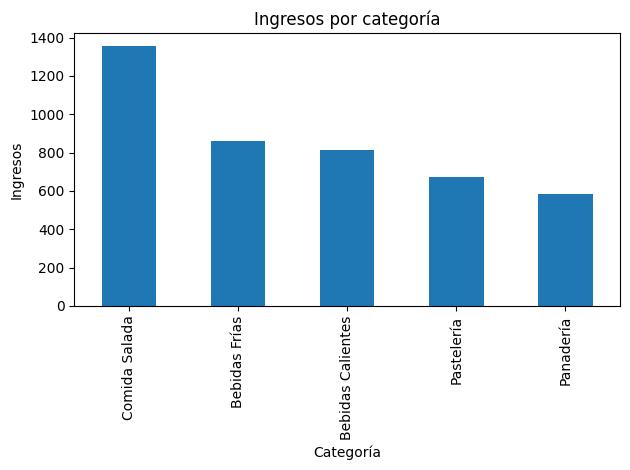

In [15]:
# =============================================
# 9) Gráfica única (TU TURNO)
# =============================================
import matplotlib.pyplot as plt
serie = df.groupby("Categoría")["Total"].sum().sort_values(ascending=False)
plt.figure()
serie.plot(kind="bar")
plt.title("Ingresos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ingresos")
plt.tight_layout()
plt.show()

In [17]:
# =============================================
# 10) IA — Insights desde pandas (TU TURNO)
# =============================================
resumen_cat = df.groupby("Categoría")["Total"].sum().sort_values(ascending=False)
texto = resumen_cat.to_string()
prompt = f"""
Actúa como analista. Con estos datos agregados:
- Escribe 3 insights accionables (con verbo)
- Propón 2 hipótesis a validar
- Sugiere 2 visualizaciones simples (y por qué)
DATOS:
{texto}
"""
print(ask_gemini(prompt, temperature=0.5))

## Análisis de Datos de Ventas

**Datos:**

| Categoría          | Ventas ($) |
|----------------------|-------------|
| Comida Salada        | 1357.20     |
| Bebidas Frías         | 861.11      |
| Bebidas Calientes     | 812.28      |
| Pastelería            | 671.61      |
| Panadería             | 583.47      |


**Insights Accionables:**

1. **Incrementar:** la oferta de productos de Comida Salada, aprovechando su alta demanda (representa el 38% del total de ventas).
2. **Optimizar:** la estrategia de precios y promociones para Bebidas Frías y Calientes, buscando aumentar sus ventas y reducir la diferencia con la Comida Salada.
3. **Desarrollar:** nuevas estrategias de marketing para Pastelería y Panadería, con el fin de impulsar las ventas de estas categorías, que presentan un menor rendimiento en comparación con las demás.


**Hipótesis a Validar:**

1. **Hipótesis 1 (Precio):**  Un aumento de precio en la categoría "Comida Salada"  no afectará significativamente las ventas, de

In [19]:
# =============================================
# 11) IA — Clasificar comentarios (TU TURNO, salida JSON)
# =============================================
comentarios = "\n".join(df["Comentario_cliente"].dropna().tolist())
prompt = f"""
Clasifica cada comentario en positivo, negativo o neutral.
Devuelve SOLO JSON con claves 'positivo', 'negativo', 'neutral' y listas de comentarios.

COMENTARIOS:
{comentarios}
"""
salida = ask_gemini(prompt, temperature=0.3, json_mode=True)
print(salida)
import json
import re

# Use a regular expression to find the JSON part of the string
match = re.search(r'\{.*\}', salida, re.DOTALL)

if match:
    json_string = match.group(0)
    try:
        data = json.loads(json_string)
        print("Claves encontradas:", list(data.keys()))
    except json.JSONDecodeError as e:
        print(f"Error al decodificar JSON después de extraer: {e}")
        print("Cadena intentando decodificar:", json_string)
else:
    print("No se encontró un bloque JSON en la salida.")
    print("Salida completa:", salida)

```json
{
  "positivo": [
    "Muy buen sabor",
    "Muy buen sabor",
    "Precio justo",
    "Recomendado",
    "Muy buen sabor",
    "Recomendado",
    "Precio justo",
    "Precio justo",
    "Recomendado",
    "Atención amable",
    "Volveré a comprar",
    "Muy buen sabor",
    "Recomendado",
    "Excelente, me encantó",
    "Sabor consistente",
    "Precio justo",
    "Recomendado",
    "Me sorprendió",
    "Excelente, me encantó",
    "Me sorprendió",
    "Sabor consistente",
    "Atención amable",
    "Sabor consistente",
    "Sabor consistente",
    "Me sorprendió",
    "Muy buen sabor",
    "Volveré a comprar",
    "Me sorprendió",
    "Me sorprendió",
    "Recomendado",
    "Excelente, me encantó",
    "Precio justo",
    "Recomendado",
    "Sabor consistente",
    "Volveré a comprar",
    "Recomendado",
    "Precio justo",
    "Volveré a comprar",
    "Me sorprendió",
    "Recomendado",
    "Muy buen sabor",
    "Recomendado",
    "Excelente, me encantó",
    "Excelente, me 

In [20]:
# =============================================
# 12) IA — Copiloto de código Matplotlib (TU TURNO)
# =============================================
contexto = "Quiero graficar mi serie 'serie' de ingresos por categoría."
prompt = f"""
Con este contexto: {contexto}
Devuélveme SOLO un snippet de Python listo para pegar en Colab que:
- Use matplotlib
- Una sola figura
- Sin estilos ni colores personalizados
- Con título, ejes y 'tight_layout()'
"""
print(ask_gemini(prompt))

```python
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Ajusta el tamaño si es necesario
plt.plot(serie)
plt.title('Ingresos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ingresos')
plt.tight_layout()
plt.show()

```



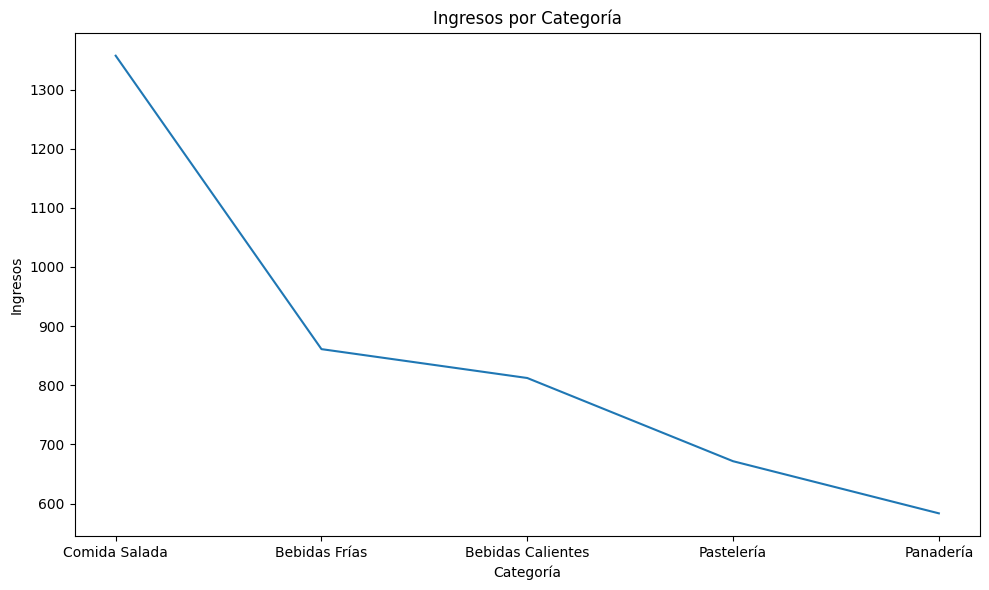

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Ajusta el tamaño si es necesario
plt.plot(serie)
plt.title('Ingresos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ingresos')
plt.tight_layout()
plt.show()

## 13) Retos creativos (opcionales)
1) **Outliers (IQR)**: detecta días anómalos de ingreso.  
2) **Cohortes simples**: primer mes de compra por cliente y gasto total.  
3) **Franjas horarias**: Mañana/Tarde/Noche y top categoría por franja.

## 14) Cierre
- Un hallazgo con `groupby`/`pivot` y por qué importa.  
- Qué limpiaste y por qué fue razonable.  
- Una idea propuesta por la IA que valga la pena testear.